<h1>Name : Pratyush Balivada</h1>

<h3> Task 6 - Prediction using Decision Tree Algorithm</h3>

<h3> Task Description : </h3>

<h5>Creating a decision tree classifier for the iris dataset and visualizing the classified data.</h5>

<h3>Importing the  necessary libraries and packages</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target']=iris.target
df['species'] = df['target'].map({0:iris.target_names[0],1:iris.target_names[1],2:iris.target_names[2]})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


<h3> Visualizing the iris feature data using seaborn plots</h3>

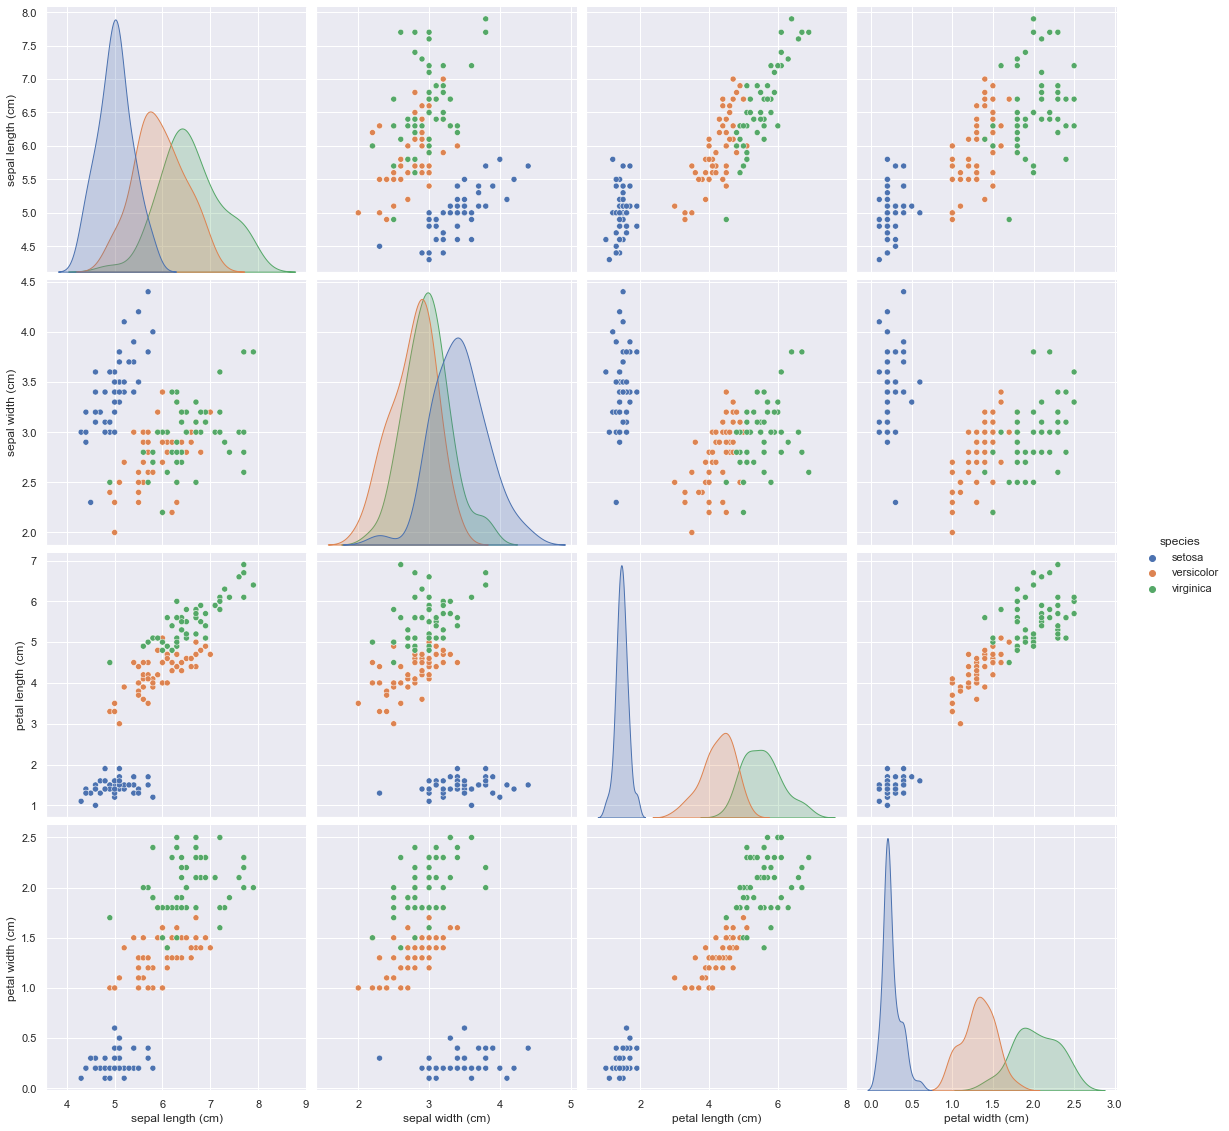

In [9]:
import seaborn as sns

sns.set()

sns.pairplot(df.drop("target", axis=1), hue="species",height=4)

<AxesSubplot:xlabel='species', ylabel='sepal length (cm)'>

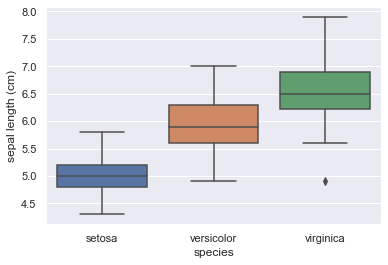

In [10]:
#Creating a box plot to observe individual feature
sns.boxplot(x="species", y="sepal length (cm)", data=df)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

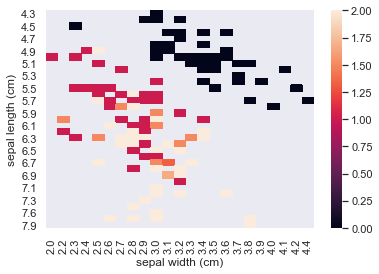

In [11]:
#Plotting a heatmap for sepal length and sepal width for target values and applying the aggregate mean function
df2 = df.pivot_table(index = 'sepal length (cm)', columns= 'sepal width (cm)', values= 'target', aggfunc= 'mean')
sns.heatmap(df2)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


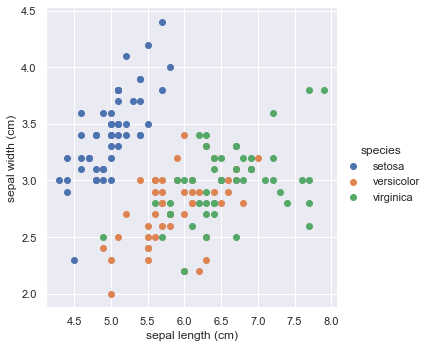

In [12]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepal length (cm)", "sepal width (cm)") \
   .add_legend()

<h2>Decision Tree Classification</h2>

In [13]:
y = df.loc[:,'target'].values
x = df.loc[:,iris.feature_names].values
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x,y)
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

<h2>Visualizing The Decision Tree</h2>

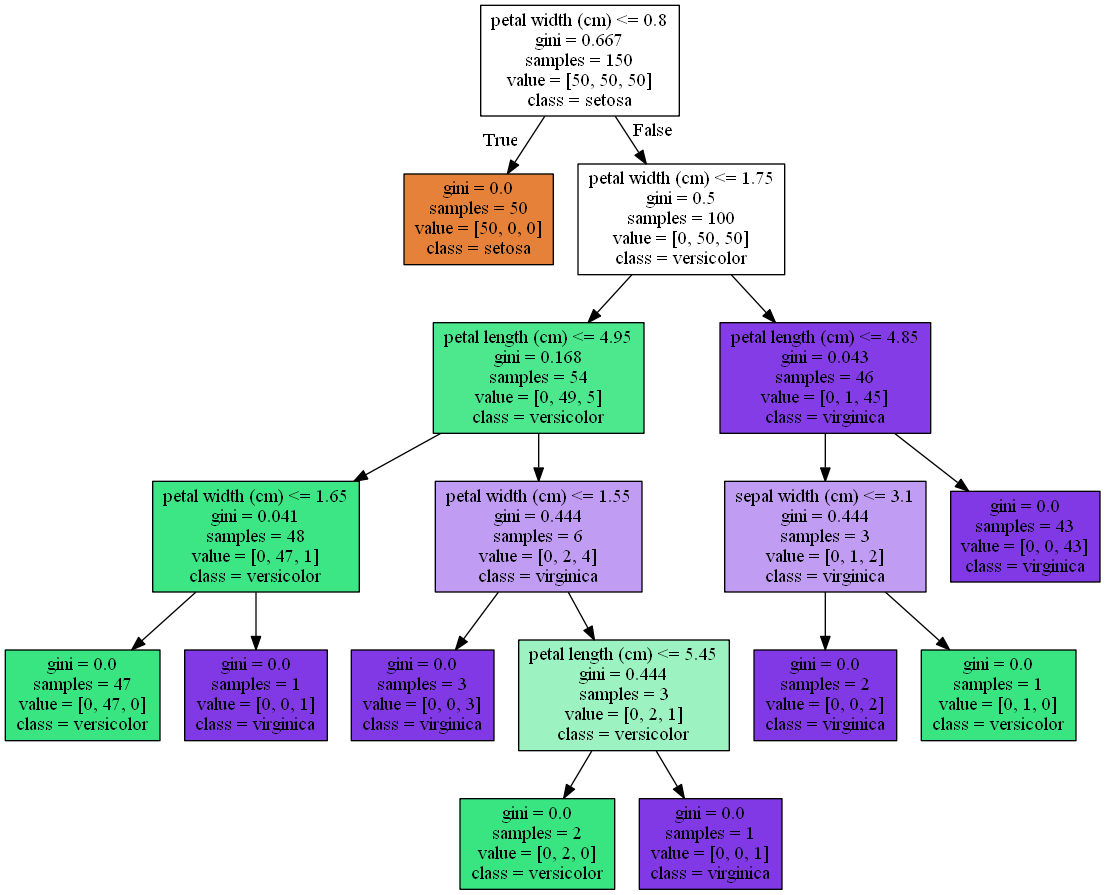

In [14]:
#Importing six which in turns calls graphviz to visualize the decision tree classification
from IPython.display import Image
import six
import sys
import pydotplus
sys.modules['sklearn.externals.six'] = six

dot_data = six.StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                          feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h2>Training the Model</h2>

In [15]:
#We are using train-test split to split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [16]:
#Feature train and test data
print(X_train)
print(X_test)

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.

In [17]:
#Target feature train and test data
print(Y_train)
print(Y_test)

[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [18]:
#We are using Xgboost gradient boosting algorithm to increase the speed and performance of our model.
#Here we are fitting the training and test set to the modal
import xgboost as xgb

train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)

In [19]:
#Defining the hyper parameters and finetuning them
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 6} 
epochs = 10

In [20]:
#Creating the model with the specified epochs
model = xgb.train(param, train, epochs)

[00:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<h2>Making Predictions</h2>

In [21]:
predictions = model.predict(test)

In [22]:
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [23]:
#Comparing the actual and predicted values
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
comparison

,Actual,Predicted
0,2,2.0
1,1,1.0
2,0,0.0
3,2,2.0
4,0,0.0
5,2,2.0
6,0,0.0
7,1,1.0
8,1,1.0
9,1,1.0


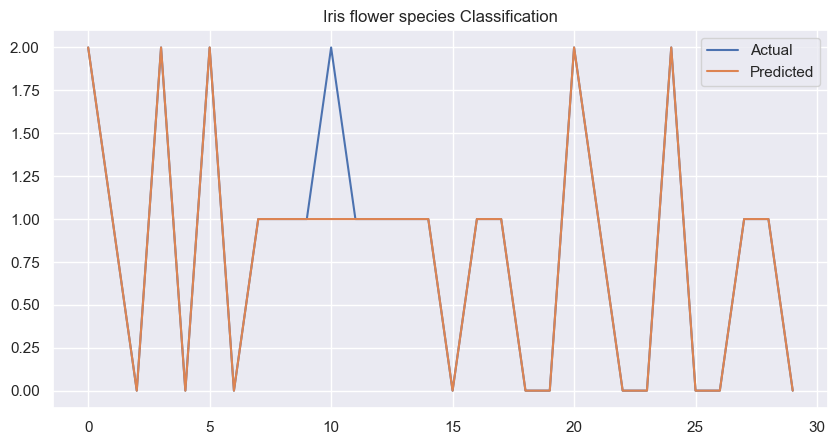

In [24]:
#Plotting the actual and predicted values
plt.figure(figsize=(10, 5), dpi=100)
range_len= range(len(Y_test))
plt.plot(range_len, Y_test, label="Actual")
plt.plot(range_len, predictions, label="Predicted")
plt.title("Iris flower species Classification")
plt.legend()
plt.show()

In [25]:
#Making prediction to a random test input
data = np.array([[4.8, 3.2, 1.6, 0.2]])
dtest = xgb.DMatrix(data)
ypred = model.predict(dtest)
print(ypred)


[0.]


<h2>Evaluating the Model</h2>

In [26]:
from sklearn.metrics import r2_score

r2 = np.sqrt(r2_score(Y_test,predictions))

print("R-squared score:",r2)

R-squared score: 0.9685785099293228


In [27]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test,predictions)
print("Accuracy score: ",acc)

Accuracy score:  0.9666666666666667


In [28]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test,predictions,squared=False))

print("RMSE value: ",rmse)

RMSE value:  0.42728700639623407


In [29]:
from sklearn.metrics import mean_absolute_error

mse = np.sqrt(mean_squared_error(Y_test,predictions))

print("MSE value: ",mse)

MSE value:  0.18257418583505536


In [30]:
#Classification Matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,predictions))

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

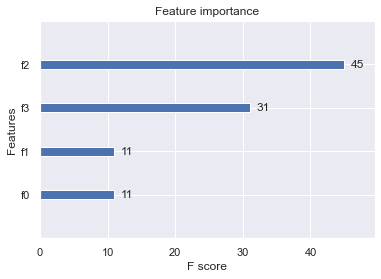

In [32]:
#Plotting the feature importance graph
# The petal length is more important among all the features for the classification
xgb.plot_importance(model)

<h4>Hence by this I conclude my task 6 presention where we determined the right class for the data by classifying the feature data and finetuned the model with XGBoost Algorithm.Then we visualized the classification and evaluated the model with various metrics and visualized the feature data using seaborn plots. Thank You!</h4>